<a href="https://colab.research.google.com/github/Abhijeet-1503/POSHAN/blob/main/Assignment_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



dataset_link = "https://raw.githubusercontent.com/Ranjit-Singh-786/MU/refs/heads/master/Student_Performance.csv"
df= pd.read_csv(dataset_link)
df

In [13]:
np.random.seed(42)  # For reproducibility
n_samples = 1000

In [14]:
hours_studied = np.random.randint(1, 10, n_samples)
previous_scores = np.random.choice(['Good', 'Average', 'Poor'], n_samples)
extracurricular_activities = np.random.choice(['Yes', 'No'], n_samples)
sleep_hours = np.random.randint(5, 9, n_samples)

performance_index = (
    5 * hours_studied
    + (np.where(previous_scores == 'Good', 10, np.where(previous_scores == 'Average', 5, 0)))
    + (np.where(extracurricular_activities == 'Yes', 3, 0))
    + 2 * sleep_hours
    + np.random.normal(0, 5, n_samples)  # Add some noise
)


In [15]:
df = pd.DataFrame(
    {
        'Hours Studied': hours_studied,
        'Previous Scores': previous_scores,
        'Extracurricular Activities': extracurricular_activities,
        'Sleep Hours': sleep_hours,
        'Performance Index': performance_index,
    }
)


In [16]:
categorical_features = ['Previous Scores', 'Extracurricular Activities']
for feature in categorical_features:
    encoder = LabelEncoder()
    df[feature + '_encoded'] = encoder.fit_transform(df[feature])



In [17]:
x = df[['Hours Studied', 'Previous Scores_encoded', 'Extracurricular Activities_encoded', 'Sleep Hours']]
y = df['Performance Index']


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:

y_pred = model.predict(x_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 35.63221207536838


In [22]:
# ... (previous code for data generation, encoding, etc.)

# 3. Define Features (x) and Target (y)
# Use encoded features instead of original categorical features
x = df[["Hours Studied", "Previous Scores_encoded", "Sleep Hours"]]
y = df["Performance Index"]  # No need for double brackets here since it's a single column

# ... (rest of the code for model training and evaluation)





In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor  # Using SGDRegressor
from sklearn.metrics import mean_squared_error
# ... (other imports and data generation/preprocessing)

# Create and train the SGDRegressor model with specified iterations
model = SGDRegressor(max_iter=10, random_state=42)  # Setting max_iter to 10
model.fit(x_train, y_train)

# ... (rest of the code for prediction and evaluation)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(max_iter=10, random_state=42)

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


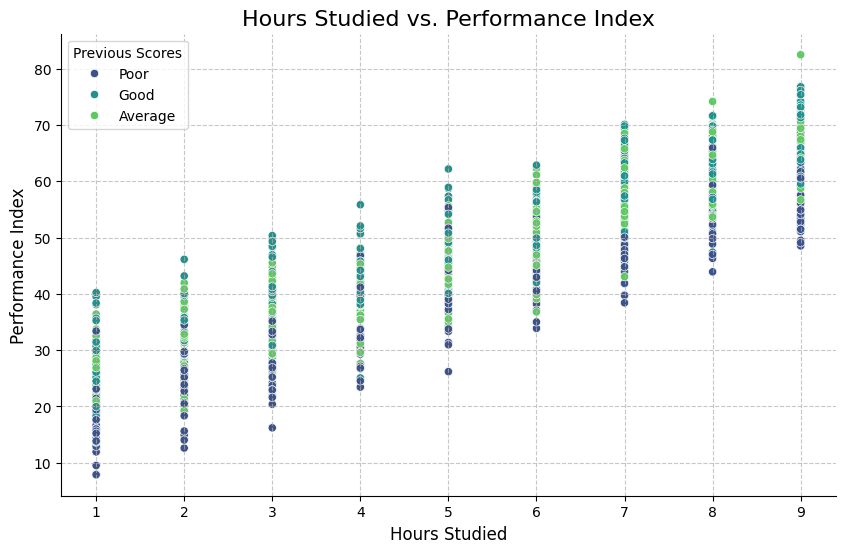

In [25]:
# ... (data generation, encoding, feature/target definition, model training)

# Visualization 1: Scatter plot of Hours Studied vs. Performance Index
plt.figure(figsize=(10, 6))  # Adjust figure size (width, height)
sns.scatterplot(x='Hours Studied', y='Performance Index', data=df, hue='Previous Scores', palette='viridis')
plt.title('Hours Studied vs. Performance Index', fontsize=16)  # Adjust title font size
plt.xlabel('Hours Studied', fontsize=12)  # Adjust x-axis label font size
plt.ylabel('Performance Index', fontsize=12)  # Adjust y-axis label font size
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
sns.despine()  # Remove top and right spines
plt.show()



<ipython-input-26-366932b0f3b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Previous Scores', y='Performance Index', data=df, palette='Set2')


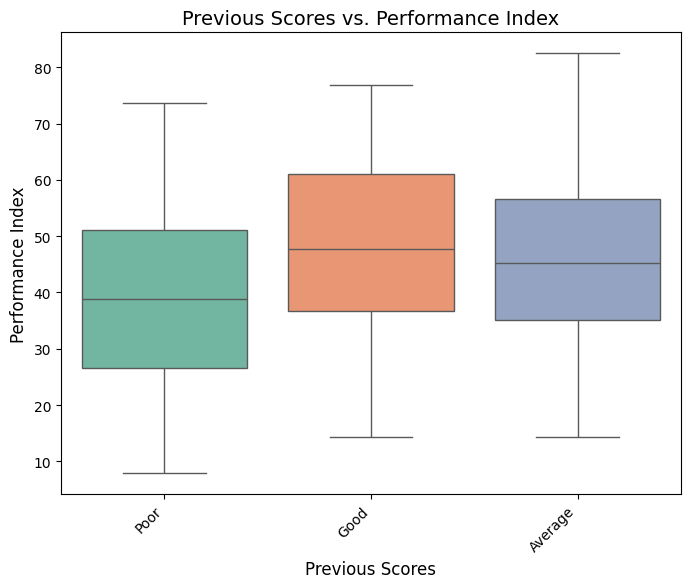

In [26]:
# Visualization 2: Box plot of Previous Scores vs. Performance Index
plt.figure(figsize=(8, 6))
sns.boxplot(x='Previous Scores', y='Performance Index', data=df, palette='Set2')
plt.title('Previous Scores vs. Performance Index', fontsize=14)
plt.xlabel('Previous Scores', fontsize=12)
plt.ylabel('Performance Index', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

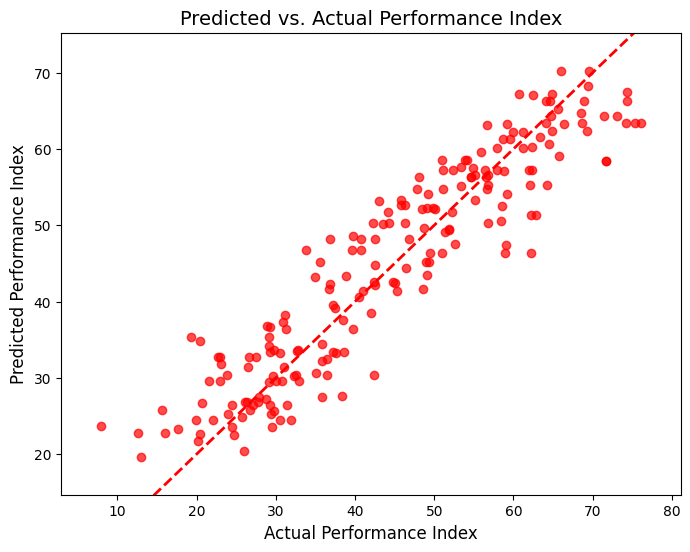

In [27]:
# Visualization 3: Predicted vs. Actual Performance Index
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line (red dashed)
plt.title('Predicted vs. Actual Performance Index', fontsize=14)
plt.xlabel('Actual Performance Index', fontsize=12)
plt.ylabel('Predicted Performance Index', fontsize=12)
plt.xlim(y_test.min() - 5, y_test.max() + 5)  # Adjust x-axis limits
plt.ylim(y_pred.min() - 5, y_pred.max() + 5)  # Adjust y-axis limits
plt.show()


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [29]:
# 1. Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. Create and train the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
}


In [30]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # 3. Calculate accuracy metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # 4. Print the accuracy results
    print(f"Model: {model_name}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  R-squared (R2): {r2}")
    print("-" * 20)  # Separator for better readability


Model: Linear Regression
  Mean Squared Error (MSE): 36.07681422287845
  Root Mean Squared Error (RMSE): 6.0063977742802255
  R-squared (R2): 0.8556194544402358
--------------------
Model: Decision Tree
  Mean Squared Error (MSE): 28.859468968822235
  Root Mean Squared Error (RMSE): 5.372100982746158
  R-squared (R2): 0.8845034972172998
--------------------
Model: Random Forest
  Mean Squared Error (MSE): 28.72709287400179
  Root Mean Squared Error (RMSE): 5.359766121203592
  R-squared (R2): 0.8850332705135552
--------------------


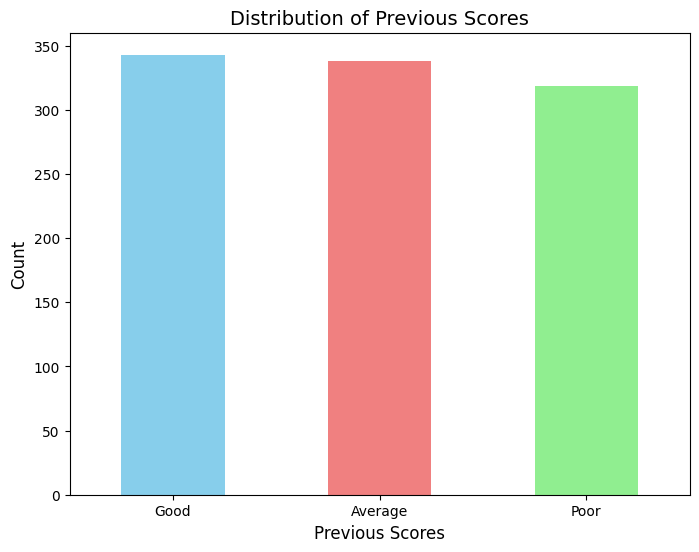

In [31]:
# plot the a bar graph

# Assuming 'df' is your DataFrame and 'x' and 'y' are defined as in the previous code.

import matplotlib.pyplot as plt

# Create a bar plot of the 'Previous Scores' distribution in the dataset
plt.figure(figsize=(8, 6))
df['Previous Scores'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Previous Scores', fontsize=14)
plt.xlabel('Previous Scores', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

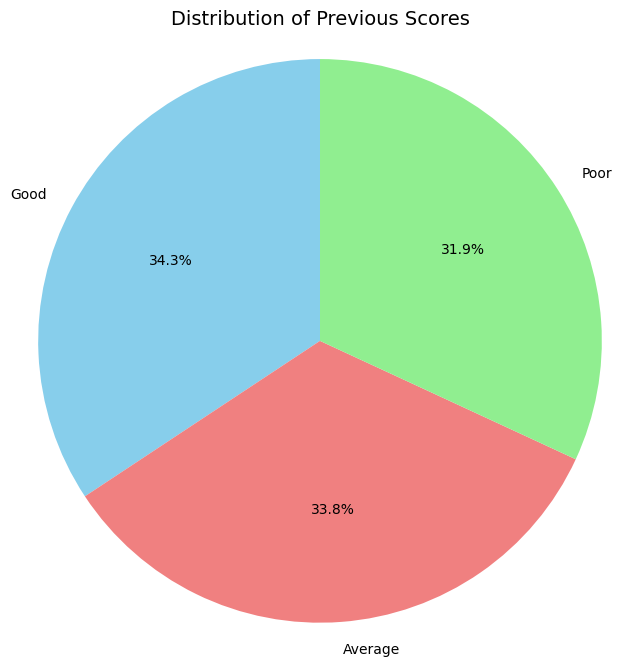

In [32]:
# prompt: plot pie graph

# Assuming 'df' is your DataFrame

# Calculate the value counts for 'Previous Scores'
previous_scores_counts = df['Previous Scores'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(previous_scores_counts, labels=previous_scores_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Previous Scores', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [34]:
#  using KNN

from sklearn.neighbors import KNeighborsRegressor

# ... (previous code)

# 1. Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. Create and train a KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(x_train, y_train)

# 3. Make predictions
y_pred_knn = knn_model.predict(x_test)

# 4. Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Model:")
print(f"  Mean Squared Error (MSE): {mse_knn}")
print(f"  Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"  R-squared (R2): {r2_knn}")

In [36]:
#  using adaboost

from sklearn.ensemble import AdaBoostRegressor

# ... (previous code for data generation, encoding, feature/target definition)

# 1. Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. Create and train the AdaBoostRegressor model
ada_boost_model = AdaBoostRegressor(random_state=42)  # You can customize hyperparameters here
ada_boost_model.fit(x_train, y_train)

# 3. Make predictions
y_pred_ada = ada_boost_model.predict(x_test)

# 4. Evaluate the model
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred_ada)

# 5. Print the results
print(f"AdaBoostRegressor:")
print(f"  Mean Squared Error (MSE): {mse_ada}")
print(f"  Root Mean Squared Error (RMSE): {rmse_ada}")
print(f"  R-squared (R2): {r2_ada}")

AdaBoostRegressor:
  Mean Squared Error (MSE): 32.558382337232025
  Root Mean Squared Error (RMSE): 5.705995297687514
  R-squared (R2): 0.8697003295426264


In [35]:
# using XGBboost

!pip install xgboost

import xgboost as xgb
# ... (previous code)

# 1. Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) # Use appropriate objective function
xgb_model.fit(x_train, y_train)

# 3. Make predictions
y_pred = xgb_model.predict(x_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model:")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  Root Mean Squared Error (RMSE): {rmse}")
print(f"  R-squared (R2): {r2}")

XGBoost Model:
  Mean Squared Error (MSE): 28.851252617121283
  Root Mean Squared Error (RMSE): 5.3713362040670365
  R-squared (R2): 0.8845363793153078


In [38]:
#  using KNN

from sklearn.neighbors import KNeighborsRegressor

# ... (previous code)

# 1. Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. Create and train a KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(x_train, y_train)

# 3. Make predictions
y_pred_knn = knn_model.predict(x_test)

# 4. Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Model:")
print(f"  Mean Squared Error (MSE): {mse_knn}")
print(f"  Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"  R-squared (R2): {r2_knn}")

KNN Model:
  Mean Squared Error (MSE): 33.746230803459824
  Root Mean Squared Error (RMSE): 5.809150609466053
  R-squared (R2): 0.8649465226089882
